In [1]:
!pip install tensorflow.keras-Dense

ERROR: Could not find a version that satisfies the requirement tensorflow.keras-Dense (from versions: none)
ERROR: No matching distribution found for tensorflow.keras-Dense


In [122]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Is this notebook running on Colab or Kaggle?
IS_COLAB = "google.colab" in sys.modules
IS_KAGGLE = "kaggle_secrets" in sys.modules

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

if not tf.config.list_physical_devices('GPU'):
    print("No GPU was detected. LSTMs and CNNs can be very slow without a GPU.")
    if IS_COLAB:
        print("Go to Runtime > Change runtime and select a GPU hardware accelerator.")
    if IS_KAGGLE:
        print("Go to Settings > Accelerator and select GPU.")

# Common imports
import pandas as pd
import numpy as np
import os
import cv2 
import random
from pathlib import Path
from tqdm import tqdm
from sklearn.utils import shuffle
#from tensorflow.keras import layers, Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib.image as mpimg
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


No GPU was detected. LSTMs and CNNs can be very slow without a GPU.


In [10]:
#datasets = [r'C:\Users\Daniel\Downloads\archive.zip\seg_train\seg_train',r'C:\Users\Daniel\Downloads\archive.zip\seg_test\seg_test']

In [58]:
# random.choice(os.listdir(img_folder))
os.listdir(img_folder)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [57]:
#os.path.join(img_folder, file)
#img=mpimg.imread(image_path)
#mpimg.imread(image_path)

array([[[ 79, 102, 108],
        [  0,   0,   9],
        [ 12,   0,   9],
        ...,
        [ 58,  62,  73],
        [109, 115, 131],
        [186, 192, 214]],

       [[133, 163, 153],
        [ 30,  37,  45],
        [ 73,  65,  80],
        ...,
        [ 46,  57,  53],
        [131, 143, 143],
        [185, 199, 200]],

       [[ 80, 105,  84],
        [  1,  12,  18],
        [170, 178, 191],
        ...,
        [105, 119, 106],
        [140, 156, 145],
        [ 38,  55,  45]],

       ...,

       [[ 52,  46,  46],
        [ 43,  32,  26],
        [ 80,  63,  53],
        ...,
        [ 94,  82,  24],
        [116, 109,  29],
        [134, 142,  33]],

       [[ 27,  17,  16],
        [114, 101,  95],
        [ 68,  51,  43],
        ...,
        [123, 111,  37],
        [102,  97,  13],
        [ 76,  87,   0]],

       [[ 84,  70,  67],
        [133, 118, 113],
        [119, 102,  95],
        ...,
        [120, 110,  25],
        [133, 132,  40],
        [109, 124,  23]]

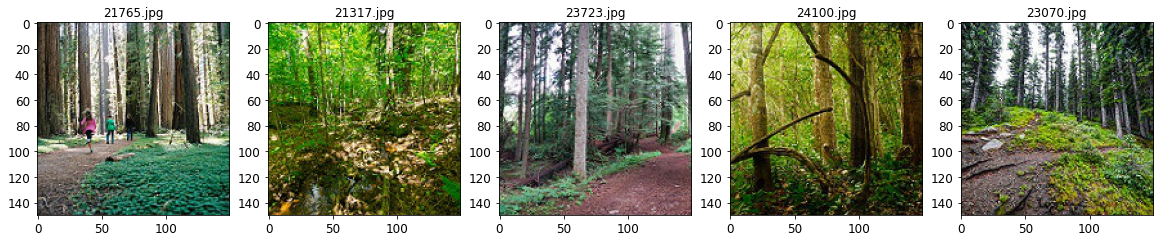

In [56]:
plt.figure(figsize=(20,20))
test_folder= r'C:\Users\Daniel\Downloads\Intel_images\seg_test\seg_test\forest'
#img_folder = (r'C:\Users\Daniel\Downloads\Intel_images\seg_train\seg_train')
for i in range(5):
  file = random.choice(os.listdir(test_folder))
  image_path= os.path.join(test_folder, file)
  img=mpimg.imread(image_path)
  ax=plt.subplot(1,5,i+1)
  ax.title.set_text(file)
  plt.imshow(img)

In [61]:
IMG_WIDTH=200
IMG_HEIGHT=200
img_folder = (r'C:\Users\Daniel\Downloads\Intel_images\seg_train\seg_train')

In [62]:
os.listdir(img_folder)

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [64]:
def create_dataset(img_folder):
   
    img_data_array=[]
    class_name=[]
   
    for dir1 in os.listdir(img_folder):
        for file in os.listdir(os.path.join(img_folder, dir1)):
       
            image_path= os.path.join(img_folder, dir1,  file)
            image= cv2.imread(image_path, cv2.COLOR_BGR2RGB)
            image=cv2.resize(image, (IMG_HEIGHT, IMG_WIDTH),interpolation = cv2.INTER_AREA)
            image=np.array(image)
            image = image.astype('float32')
            image /= 255 
            img_data_array.append(image)
            class_name.append(dir1)
    return img_data_array, class_name
# extract the image array and class name
img_data, class_name = create_dataset(r'C:\Users\Daniel\Downloads\Intel_images\seg_train\seg_train')

In [71]:
img_data

[array([[[0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],
 
        [[0.95686275, 0.9647059 , 0.9647059 ],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],
 
        [[0.95686275, 0.9647059 , 0.9647059 ],
         [0.95686275, 0.9647059 , 0.9647059 ],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],
 
        ...,
 
        [[0.2509804 , 0.25882354, 0.2627451 ],
         [0.21176471, 0.21960784, 0.22352

In [74]:
{k: v for v, k in enumerate(np.unique(class_name))}

{'buildings': 0,
 'forest': 1,
 'glacier': 2,
 'mountain': 3,
 'sea': 4,
 'street': 5}

## (a) Create a training set containing at least 100 images per class. For example, you could classify your own pictures based on the location (beach, mountain, city, etc.), or alternatively you can use an existing dataset (e.g., from TensorFlow Datasets).

In [86]:
np.array(img_data)

array([[[[0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],

        [[0.95686275, 0.9647059 , 0.9647059 ],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],

        [[0.95686275, 0.9647059 , 0.9647059 ],
         [0.95686275, 0.9647059 , 0.9647059 ],
         [0.9607843 , 0.96862745, 0.96862745],
         ...,
         [0.9647059 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745],
         [0.9607843 , 0.96862745, 0.96862745]],

        ...,

        [[0.2509804 , 0.25882354, 0.2627451 ],
         [0.21176471, 0.21960784, 0.22352941]

In [ ]:
is (img_data) np.array

In [88]:
?tqdm

Object `tqdm` not found.


## (c) Build the input pipeline, including the appropriate preprocessing operations, and optionally add data augmentation.

In [127]:
def get_images(directory):
    Images = []
    Labels = []
    label = 0

    for labels in os.listdir(directory):
        if labels == 'glacier':
            label = 2
        elif labels == 'sea':
            labels = 4
        elif labels == 'forest':
            label = 1
        elif labels == 'buildings':
            labels == 0
        elif labels == 'street':
            label = 5
        elif labels == 'mountain':
            label = 3
        
        for image_file in os.listdir(directory+(labels)): #Extracting the file name of the image from Class Label folder
            image = cv2.imread(directory+labels+r'/'+image_file) #Reading the image (OpenCV)
            image = cv2.resize(image,(150,150)) #Resize the image, Some images are different sizes. (Resizing is very Important)
            Images.append(image)
            Labels.append((label))

def get_classlabel(class_code):
    labels = {2:'glacier', 4:'sea', 1:'forest', 0:'buildings', 5:'street', 3:'mountain'}
    
    return labels[class_code]

In [131]:
Images, Labels = get_images('C:/Users/Daniel/Downloads/Intel_images/seg_train/seg_train/') #Extract the training images from the folders.

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)

TypeError: can only concatenate str (not "int") to str

In [130]:
os.listdir('C:/Users/Daniel/Downloads/Intel_images/seg_train/seg_train/')

['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']